# Import Libaries

In [1]:
#pip install library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#pip install geopandas

In [3]:
#pip install geopy

# Import Raw Data

Data sources from 

https://data.lacity.org/Administration-Finance/Listing-of-Active-Businesses/6rrh-rzua
    
https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8

In [4]:
crime_data = pd.read_csv('../data/raw/Crime_Data_from_2020_to_Present.csv')

In [5]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788767 entries, 0 to 788766
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           788767 non-null  int64  
 1   Date Rptd       788767 non-null  object 
 2   DATE OCC        788767 non-null  object 
 3   TIME OCC        788767 non-null  int64  
 4   AREA            788767 non-null  int64  
 5   AREA NAME       788767 non-null  object 
 6   Rpt Dist No     788767 non-null  int64  
 7   Part 1-2        788767 non-null  int64  
 8   Crm Cd          788767 non-null  int64  
 9   Crm Cd Desc     788767 non-null  object 
 10  Mocodes         680162 non-null  object 
 11  Vict Age        788767 non-null  int64  
 12  Vict Sex        685415 non-null  object 
 13  Vict Descent    685407 non-null  object 
 14  Premis Cd       788758 non-null  float64
 15  Premis Desc     788300 non-null  object 
 16  Weapon Used Cd  274517 non-null  float64
 17  Weapon Des

In [6]:
crime_data.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,7.887670e+05,788767.000000,788767.000000,788767.000000,788767.000000,788767.000000,788767.000000,788758.000000,274517.000000,788757.000000,58171.000000,1936.000000,57.000000,788767.000000,788767.000000
mean,2.155268e+08,1335.387175,10.718161,1118.240805,1.414420,500.681156,29.870409,305.737002,362.712699,500.421717,957.408640,983.680269,990.368421,33.975730,-118.014490
std,1.061323e+07,654.088731,6.091460,609.128599,0.492622,207.839547,21.754439,216.599367,123.729456,207.629163,111.701526,51.099453,28.594225,1.825849,6.331202
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-3.000000,101.000000,101.000000,110.000000,210.000000,434.000000,821.000000,0.000000,-118.667600
25%,2.101124e+08,900.000000,6.000000,622.000000,1.000000,331.000000,9.000000,101.000000,309.000000,331.000000,998.000000,998.000000,998.000000,34.013300,-118.429600
50%,2.121087e+08,1415.000000,11.000000,1142.000000,1.000000,442.000000,31.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.000000,34.058300,-118.321500
75%,2.217165e+08,1900.000000,16.000000,1617.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,34.163100,-118.273900
max,2.399165e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,974.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.334300,0.000000


In [7]:
crime_data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [8]:
biz_data = pd.read_csv('../data/raw/Listing_of_Active_Businesses.csv')

In [9]:
biz_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574882 entries, 0 to 574881
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LOCATION ACCOUNT #         574882 non-null  object 
 1   BUSINESS NAME              574881 non-null  object 
 2   DBA NAME                   195125 non-null  object 
 3   STREET ADDRESS             574878 non-null  object 
 4   CITY                       574830 non-null  object 
 5   ZIP CODE                   574882 non-null  object 
 6   LOCATION DESCRIPTION       574856 non-null  object 
 7   MAILING ADDRESS            293126 non-null  object 
 8   MAILING CITY               293139 non-null  object 
 9   MAILING ZIP CODE           292999 non-null  object 
 10  NAICS                      512105 non-null  float64
 11  PRIMARY NAICS DESCRIPTION  512105 non-null  object 
 12  COUNCIL DISTRICT           574882 non-null  int64  
 13  LOCATION START DATE        57

In [10]:
biz_data.describe()

,NAICS,COUNCIL DISTRICT,LOCATION END DATE
count,512105.000000,574882.000000,0.0
mean,548418.738187,6.396020,NaN
std,164242.149238,4.940528,NaN
min,115210.000000,0.000000,NaN
25%,452000.000000,2.000000,NaN
50%,541213.000000,5.000000,NaN
75%,624200.000000,11.000000,NaN
max,999999.000000,15.000000,NaN


In [11]:
biz_data.head()

,LOCATION ACCOUNT #,BUSINESS NAME,DBA NAME,STREET ADDRESS,CITY,ZIP CODE,LOCATION DESCRIPTION,MAILING ADDRESS,MAILING CITY,MAILING ZIP CODE,NAICS,PRIMARY NAICS DESCRIPTION,COUNCIL DISTRICT,LOCATION START DATE,LOCATION END DATE,LOCATION
0,0000000150-0001-5,A A OFICINA CENTRAL HISPANA DE LOS ANGELES /C,NaN,2015 W TEMPLE STREET,LOS ANGELES,90026-4913,2015 TEMPLE 90026-4913,2607 VAN BUREN PLACE,LOS ANGELES,90007-2129,611000.0,"Educational services (including schools, colle...",13,01/01/1991,NaN,NaN
1,0000000156-0001-2,SPRINGBOARD NON-PROFIT CONSUMER CREDIT MANAGEMENT,MONEY MANAGEMENT INTERNATIONAL,1605 W OLYMPIC BLVD #9023,LOS ANGELES,90015-3828,1605 OLYMPIC 90015-3828,NaN,NaN,NaN,523900.0,Other financial investment activities (includi...,1,02/01/1999,NaN,NaN
2,0002842614-0001-2,AUSTIN B CREEK,NaN,3610 W MAGNOLIA BLVD,BURBANK,91505-2913,3610 MAGNOLIA 91505-2913,NaN,NaN,NaN,711510.0,"Independent artists, writers, & performers",0,09/01/2008,NaN,"(34.168, -118.3463)"
3,0003176540-0001-1,SOEUNG CHAING,CAFECAFE,1330 W PACIFIC COAST HIGHWAY SUITE #E,WILMINGTON,90744-2467,1330 PACIFIC COAST 90744-2467,NaN,NaN,NaN,722211.0,Limited-service eating places,15,01/01/2020,NaN,"(33.7901, -118.2804)"
4,0002728984-0001-8,MARIA ALVAREZ,NaN,9625 SYLMAR AVENUE UNIT #23,PANORAMA CITY,91402-1153,9625 SYLMAR 91402-1153,NaN,NaN,NaN,561720.0,Janitorial services,6,01/01/2013,NaN,"(34.2447, -118.4476)"


#For crime data, need only location , type of crime & crime date rough timing . 
#the rest of the columns shall be dropped..

# Explore Data

For crime data, focus on location , type of crime & crime date / rough timing. 

For existing business, focus on locaton data and business registration info ,you may keep start date. Mailing address  and DBA ( do bussinss as) columns seems  not important.

# Number Of Missing Values By Column 

In [12]:
missing_biz = pd.concat([biz_data.isnull().sum(), 100 * biz_data.isnull().mean()], axis=1)
missing_biz.columns=['count', '%']
missing_biz.sort_values(by=['count'])

,count,%
LOCATION ACCOUNT #,0,0.000000
ZIP CODE,0,0.000000
COUNCIL DISTRICT,0,0.000000
BUSINESS NAME,1,0.000174
STREET ADDRESS,4,0.000696
LOCATION DESCRIPTION,26,0.004523
CITY,52,0.009045
LOCATION START DATE,3578,0.622389
LOCATION,19576,3.405221
NAICS,62777,10.919980


In [13]:
missing_crime= pd.concat([crime_data.isnull().sum(), 100 * crime_data.isnull().mean()], axis=1)
missing_crime.columns=['count', '%']
missing_crime.sort_values(by=['count'])

,count,%
DR_NO,0,0.000000
LOCATION,0,0.000000
Status Desc,0,0.000000
Status,0,0.000000
LAT,0,0.000000
Vict Age,0,0.000000
Crm Cd Desc,0,0.000000
Crm Cd,0,0.000000
LON,0,0.000000
Rpt Dist No,0,0.000000


In [14]:
# update all columns name to upper case for crime dataset
crime_data.columns = crime_data.columns.str.upper()

# CLEAN DATA

In [15]:
# Convert date columns to datetime
biz_data['LOCATION START DATE'] = pd.to_datetime(biz_data['LOCATION START DATE'], errors='coerce')
crime_data['DATE RPTD'] = pd.to_datetime(crime_data['DATE RPTD'])
crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'])

In [16]:
# Update values to be upper case and remove leading/trailing spaces
biz_data['CITY'] = biz_data['CITY'].str.upper().str.strip()
crime_data['AREA NAME'] = crime_data['AREA NAME'].str.upper().str.strip()

Business Dataset : Lets convert LAT & LON into sepearate columns from LOCATION  column ,and drop LOCATION, since existing LOCATION col from Business data and Crime data are different

In [17]:
# Create new 'LAT' and 'LON' columns and fill them with NaN initially
biz_data['LAT'] = np.nan
biz_data['LON'] = np.nan

## Function to extract latitude and longitude from LOCATION column from biz_data
def extract_lat_lon(location):
    if pd.isnull(location):
        return (np.nan, np.nan)
    
    # Check if the location is a string
    if isinstance(location, str):
        # Remove parentheses and split by comma
        parts = location.strip('()').split(', ')
        
        if len(parts) == 2:
            return (float(parts[0]), float(parts[1]))
    
    return (np.nan, np.nan)

# Apply the function to create two new columns
biz_data[['LAT', 'LON']] = biz_data['LOCATION'].apply(extract_lat_lon).apply(pd.Series)


# Apply the function to create two new columns
biz_data.head()

,LOCATION ACCOUNT #,BUSINESS NAME,DBA NAME,STREET ADDRESS,CITY,ZIP CODE,LOCATION DESCRIPTION,MAILING ADDRESS,MAILING CITY,MAILING ZIP CODE,NAICS,PRIMARY NAICS DESCRIPTION,COUNCIL DISTRICT,LOCATION START DATE,LOCATION END DATE,LOCATION,LAT,LON
0,0000000150-0001-5,A A OFICINA CENTRAL HISPANA DE LOS ANGELES /C,NaN,2015 W TEMPLE STREET,LOS ANGELES,90026-4913,2015 TEMPLE 90026-4913,2607 VAN BUREN PLACE,LOS ANGELES,90007-2129,611000.0,"Educational services (including schools, colle...",13,1991-01-01,NaN,NaN,NaN,NaN
1,0000000156-0001-2,SPRINGBOARD NON-PROFIT CONSUMER CREDIT MANAGEMENT,MONEY MANAGEMENT INTERNATIONAL,1605 W OLYMPIC BLVD #9023,LOS ANGELES,90015-3828,1605 OLYMPIC 90015-3828,NaN,NaN,NaN,523900.0,Other financial investment activities (includi...,1,1999-02-01,NaN,NaN,NaN,NaN
2,0002842614-0001-2,AUSTIN B CREEK,NaN,3610 W MAGNOLIA BLVD,BURBANK,91505-2913,3610 MAGNOLIA 91505-2913,NaN,NaN,NaN,711510.0,"Independent artists, writers, & performers",0,2008-09-01,NaN,"(34.168, -118.3463)",34.1680,-118.3463
3,0003176540-0001-1,SOEUNG CHAING,CAFECAFE,1330 W PACIFIC COAST HIGHWAY SUITE #E,WILMINGTON,90744-2467,1330 PACIFIC COAST 90744-2467,NaN,NaN,NaN,722211.0,Limited-service eating places,15,2020-01-01,NaN,"(33.7901, -118.2804)",33.7901,-118.2804
4,0002728984-0001-8,MARIA ALVAREZ,NaN,9625 SYLMAR AVENUE UNIT #23,PANORAMA CITY,91402-1153,9625 SYLMAR 91402-1153,NaN,NaN,NaN,561720.0,Janitorial services,6,2013-01-01,NaN,"(34.2447, -118.4476)",34.2447,-118.4476


In [18]:
#drop locaion colum
biz_data.drop(columns='LOCATION', inplace=True)

# Remove unnessary or missing info/columns from Datasets

Busienss Data : 

1. The council district reflects #the current council district assignment for that location address. "0" means the business location is out of the City. Should those records to be dropped ?

ANS: No. Majority of those businesses are still performing in LA Country area.

In [19]:
#biz location out of city
rows_bizoutofcity = biz_data[biz_data['COUNCIL DISTRICT'] == 0]
rows_bizoutofcity.head(5)

,LOCATION ACCOUNT #,BUSINESS NAME,DBA NAME,STREET ADDRESS,CITY,ZIP CODE,LOCATION DESCRIPTION,MAILING ADDRESS,MAILING CITY,MAILING ZIP CODE,NAICS,PRIMARY NAICS DESCRIPTION,COUNCIL DISTRICT,LOCATION START DATE,LOCATION END DATE,LAT,LON
2,0002842614-0001-2,AUSTIN B CREEK,NaN,3610 W MAGNOLIA BLVD,BURBANK,91505-2913,3610 MAGNOLIA 91505-2913,NaN,NaN,NaN,711510.0,"Independent artists, writers, & performers",0,2008-09-01,NaN,34.1680,-118.3463
7,0003318526-0001-9,MARTIN HERNANDEZ,E H PAINTING,1421 PICO STREET,SAN FERNANDO,91340-3506,1421 PICO 91340-3506,NaN,NaN,NaN,233210.0,Single Family Housing Construction (1997 NAICS),0,2022-06-01,NaN,NaN,NaN
8,0003325082-0001-6,KIANNA VERDUZCO,INSIGHT THERAPY,28975 Valley Heights,AGOURA HILLS,91301-3362,28975 VALLEY HEIGHTS 91301,NaN,NaN,NaN,NaN,NaN,0,2022-08-01,NaN,34.1529,34.1529
11,0003003114-0001-4,LYNAZIA BROWN,THE SCENE CHIC,10634 S WILTON PLACE,LOS ANGELES,90047-4352,10634 WILTON 90047-4352,NaN,NaN,NaN,315000.0,Apparel mfg.,0,2017-08-01,NaN,33.9390,-118.3140
16,0003317854-0001-8,JANELL ALEXANDER,NaN,2283 Lake,ALTADENA,91001-2414,2283 LAKE 91001,NaN,NaN,NaN,NaN,NaN,0,2022-06-02,NaN,34.1850,34.1850


In [20]:
biz_data['CITY'].value_counts()

LOS ANGELES                  275152
VAN NUYS                      20364
NORTH HOLLYWOOD               17271
SHERMAN OAKS                  15383
WOODLAND HILLS                13156
                              ...  
BARTLETT                          1
ANTELOPE                          1
KANGNAMKU SEOUL                   1
SOUTH MELBOURNE, VICTORIA         1
COCOA BEACH                       1
Name: CITY, Length: 3016, dtype: int64

In [21]:

filtered_data1 = biz_data[biz_data['CITY'] == "SOUTH MELBOURNE, VICTORIA"]
filtered_data1.head()

,LOCATION ACCOUNT #,BUSINESS NAME,DBA NAME,STREET ADDRESS,CITY,ZIP CODE,LOCATION DESCRIPTION,MAILING ADDRESS,MAILING CITY,MAILING ZIP CODE,NAICS,PRIMARY NAICS DESCRIPTION,COUNCIL DISTRICT,LOCATION START DATE,LOCATION END DATE,LAT,LON
61493,0002596086-0001-2,CEVENTAS PTY LTD,ACI ONLINE LEARNING CENTER,10 YORK STREET,"SOUTH MELBOURNE, VICTORIA",3205 -,10 YORK 3205,NaN,NaN,NaN,999999.0,Unclassified establishments (unable to classify),0,2011-11-07,NaN,0.0,0.0


There are some business out of LA country.Zip code boundaries from Los Angeles County range from 90001 to 93599 . At least zipcode should start with 9

In [22]:
#check data zip code not starting 9
filtered_data2 =  biz_data[~biz_data['ZIP CODE'].str.startswith("9")]
print(filtered_data2.info())
filtered_data2['CITY'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8688 entries, 106 to 574875
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   LOCATION ACCOUNT #         8688 non-null   object        
 1   BUSINESS NAME              8688 non-null   object        
 2   DBA NAME                   1834 non-null   object        
 3   STREET ADDRESS             8684 non-null   object        
 4   CITY                       8669 non-null   object        
 5   ZIP CODE                   8688 non-null   object        
 6   LOCATION DESCRIPTION       8683 non-null   object        
 7   MAILING ADDRESS            4565 non-null   object        
 8   MAILING CITY               4567 non-null   object        
 9   MAILING ZIP CODE           4531 non-null   object        
 10  NAICS                      7596 non-null   float64       
 11  PRIMARY NAICS DESCRIPTION  7596 non-null   object        
 12  CO

NEW YORK        766
LAS VEGAS       227
CHICAGO         158
HOUSTON         153
LOS ANGELES     135
               ... 
BEACON FALLS      1
ATHOL             1
TEWKSBURY         1
GLEN CARBON       1
COCOA BEACH       1
Name: CITY, Length: 2178, dtype: int64

Drop - unnecessary columns that are not needed for prediction  + missing values more than 80 %

In [23]:
# BIZ data - remove those zip code doesn't start with 9.

biz_data = biz_data.loc[biz_data['ZIP CODE'].str.startswith("9")]
biz_data.head()

,LOCATION ACCOUNT #,BUSINESS NAME,DBA NAME,STREET ADDRESS,CITY,ZIP CODE,LOCATION DESCRIPTION,MAILING ADDRESS,MAILING CITY,MAILING ZIP CODE,NAICS,PRIMARY NAICS DESCRIPTION,COUNCIL DISTRICT,LOCATION START DATE,LOCATION END DATE,LAT,LON
0,0000000150-0001-5,A A OFICINA CENTRAL HISPANA DE LOS ANGELES /C,NaN,2015 W TEMPLE STREET,LOS ANGELES,90026-4913,2015 TEMPLE 90026-4913,2607 VAN BUREN PLACE,LOS ANGELES,90007-2129,611000.0,"Educational services (including schools, colle...",13,1991-01-01,NaN,NaN,NaN
1,0000000156-0001-2,SPRINGBOARD NON-PROFIT CONSUMER CREDIT MANAGEMENT,MONEY MANAGEMENT INTERNATIONAL,1605 W OLYMPIC BLVD #9023,LOS ANGELES,90015-3828,1605 OLYMPIC 90015-3828,NaN,NaN,NaN,523900.0,Other financial investment activities (includi...,1,1999-02-01,NaN,NaN,NaN
2,0002842614-0001-2,AUSTIN B CREEK,NaN,3610 W MAGNOLIA BLVD,BURBANK,91505-2913,3610 MAGNOLIA 91505-2913,NaN,NaN,NaN,711510.0,"Independent artists, writers, & performers",0,2008-09-01,NaN,34.1680,-118.3463
3,0003176540-0001-1,SOEUNG CHAING,CAFECAFE,1330 W PACIFIC COAST HIGHWAY SUITE #E,WILMINGTON,90744-2467,1330 PACIFIC COAST 90744-2467,NaN,NaN,NaN,722211.0,Limited-service eating places,15,2020-01-01,NaN,33.7901,-118.2804
4,0002728984-0001-8,MARIA ALVAREZ,NaN,9625 SYLMAR AVENUE UNIT #23,PANORAMA CITY,91402-1153,9625 SYLMAR 91402-1153,NaN,NaN,NaN,561720.0,Janitorial services,6,2013-01-01,NaN,34.2447,-118.4476


In [24]:
# Remove columns that are not needed for prediction

columns_to_drop_biz = ['COUNCIL DISTRICT','LOCATION ACCOUNT #','DBA NAME', 'MAILING ADDRESS', 'MAILING CITY','MAILING ZIP CODE' ,'DBA NAME','LOCATION END DATE']
biz_data.drop(columns=columns_to_drop_biz, inplace=True)




In [25]:
columns_to_drop_crime= ['DR_NO', 'CROSS STREET','CRM CD 2', 'CRM CD 3', 'CRM CD 4']
crime_data.drop(columns=columns_to_drop_crime, inplace=True)

In [26]:
print(biz_data.info())
print(crime_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566194 entries, 0 to 574881
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   BUSINESS NAME              566193 non-null  object        
 1   STREET ADDRESS             566194 non-null  object        
 2   CITY                       566161 non-null  object        
 3   ZIP CODE                   566194 non-null  object        
 4   LOCATION DESCRIPTION       566173 non-null  object        
 5   NAICS                      504509 non-null  float64       
 6   PRIMARY NAICS DESCRIPTION  504509 non-null  object        
 7   LOCATION START DATE        562733 non-null  datetime64[ns]
 8   LAT                        547023 non-null  float64       
 9   LON                        547023 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 47.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeI

# Handle Missing values

In [27]:
# Fill missing values
crime_data['MOCODES'].fillna('', inplace=True)
crime_data['VICT SEX'].fillna('Unknown', inplace=True)
crime_data['VICT DESCENT'].fillna('Unknown', inplace=True)
crime_data['PREMIS DESC'].fillna('Unknown', inplace=True)
crime_data['WEAPON DESC'].fillna('None', inplace=True)
crime_data['CRM CD 1'].fillna(-1, inplace=True)

biz_data['STREET ADDRESS'].fillna('', inplace=True)
biz_data['CITY'].fillna('', inplace=True)
biz_data['LOCATION DESCRIPTION'].fillna('', inplace=True)
biz_data['NAICS'].fillna(-1, inplace=True)
biz_data['PRIMARY NAICS DESCRIPTION'].fillna('Unknown', inplace=True)

# Check if there is any duplicate records after removing raw data unique IDs

In [28]:
duplicate_rows_biz = biz_data[biz_data.duplicated(keep='first')]
duplicate_rows_biz

,BUSINESS NAME,STREET ADDRESS,CITY,ZIP CODE,LOCATION DESCRIPTION,NAICS,PRIMARY NAICS DESCRIPTION,LOCATION START DATE,LAT,LON
31415,ANGEL'S ROOFING INC.,16458 LORENE DRIVE,VICTORVILLE,92395-4125,16458 LORENE 92395,235610.0,"Roofing, Siding, and Sheet Metal Contractors (...",2018-09-28,34.5138,-117.3049
34107,GERTRUDE LEON,13625 S MARIPOSA AVENUE,GARDENA,90247-2005,13625 MARIPOSA 90247,-1.0,Unknown,2020-08-01,33.9075,-118.2996
38242,EVELYN GONZALEZ,13195 DE GARMO AVENUE,SYLMAR,91342-3916,13195 De Garmo 91342-3916,561720.0,Janitorial services,2020-09-02,34.3098,-118.4563
41027,DANIEL SILVA CONTRERAS,5127 SUNBURST DRIVE,PALMDALE,93552-5328,5127 Sunburst 93552-5328,561730.0,Landscaping services,2022-07-20,34.5506,-118.0374
47105,MANAGEMENT EXECUTIVE RECRUITERS INC,8939 WOODMAN AVENUE SUITE #9,ARLETA,91331-8015,8939 WOODMAN 91331,-1.0,Unknown,2019-07-22,34.2319,-118.4386
...,...,...,...,...,...,...,...,...,...,...
566717,EVETTE CORD,645 W 9TH STREET SUITE #110249,LOS ANGELES,90015-1640,645 9TH 90015-1640,812990.0,All other personal services,2020-04-07,34.0458,-118.2606
566928,UNTOUCHABLE APPRENTICE TRAINING & ACADEMY,5345 CRENSHAW BLVD,LOS ANGELES,90043-1809,5345 CRENSHAW 90043-1809,611000.0,"Educational services (including schools, colle...",2022-01-11,33.9936,-118.3310
570374,PANDA EXPRESS INC,2619 N FIGUEROA STREET SUITE #D,LOS ANGELES,90065-1025,2619 Figueroa 90065-1025,722110.0,Full-service restaurants,2020-08-01,34.0848,-118.2221
570597,PAUL LING,5050 TUJUNGA AVENUE,NORTH HOLLYWOOD,91601-4236,5050 Tujunga 91601-4236,531100.0,Lessors of real estate (including mini warehou...,2021-12-01,34.1622,-118.3786


In [29]:
duplicate_rows_crime = crime_data[crime_data.duplicated(keep='first')]
duplicate_rows_crime

,DATE RPTD,DATE OCC,TIME OCC,AREA,AREA NAME,RPT DIST NO,PART 1-2,CRM CD,CRM CD DESC,MOCODES,...,PREMIS CD,PREMIS DESC,WEAPON USED CD,WEAPON DESC,STATUS,STATUS DESC,CRM CD 1,LOCATION,LAT,LON
67,2020-01-01,2020-01-01,905,1,CENTRAL,153,2,623,BATTERY POLICE (SIMPLE),2004 1212 0917 0910 1822 0417 2048,...,902.0,MTA - RED LINE - PERSHING SQUARE,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,623.0,500 S HILL ST,34.0488,-118.2518
873,2020-01-26,2020-01-26,125,1,CENTRAL,171,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 0344,...,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,624.0,800 W OLYMPIC BL,34.0450,-118.2640
1079,2020-01-30,2020-01-28,1725,1,CENTRAL,124,2,956,"LETTERS, LEWD - TELEPHONE CALLS, LEWD",,...,726.0,POLICE FACILITY,NaN,None,IC,Invest Cont,956.0,100 W 1ST ST,34.0522,-118.2434
1080,2020-01-30,2020-01-28,1725,1,CENTRAL,124,2,956,"LETTERS, LEWD - TELEPHONE CALLS, LEWD",,...,726.0,POLICE FACILITY,NaN,None,IC,Invest Cont,956.0,100 W 1ST ST,34.0522,-118.2434
1082,2020-01-30,2020-01-28,1725,1,CENTRAL,124,2,956,"LETTERS, LEWD - TELEPHONE CALLS, LEWD",,...,726.0,POLICE FACILITY,NaN,None,IC,Invest Cont,956.0,100 W 1ST ST,34.0522,-118.2434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788293,2023-03-24,2023-03-23,1940,13,NEWTON,1333,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 0344,...,405.0,CLOTHING STORE,NaN,None,IC,Invest Cont,343.0,3200 S CENTRAL AV,34.0174,-118.2621
788357,2023-03-13,2023-03-13,41,2,RAMPART,285,2,890,FAILURE TO YIELD,1822 1309,...,101.0,STREET,NaN,None,IC,Invest Cont,890.0,12TH,34.0472,-118.2782
788460,2023-03-16,2023-03-10,2345,2,RAMPART,269,1,510,VEHICLE - STOLEN,,...,108.0,PARKING LOT,NaN,None,IC,Invest Cont,510.0,700 S BIXEL ST,34.0509,-118.2642
788628,2023-05-21,2023-05-19,2230,16,FOOTHILL,1685,2,437,RESISTING ARREST,1501 1816 0416,...,101.0,STREET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,437.0,FAIR,34.2173,-118.3835


In [30]:
#Remove dupliate and keep as new cleaned dataframes

biz_data_cleaned = biz_data.drop_duplicates(keep='last')
crime_data_cleaned = crime_data.drop_duplicates(keep='last')




In [31]:
biz_data_cleaned.head()

,BUSINESS NAME,STREET ADDRESS,CITY,ZIP CODE,LOCATION DESCRIPTION,NAICS,PRIMARY NAICS DESCRIPTION,LOCATION START DATE,LAT,LON
0,A A OFICINA CENTRAL HISPANA DE LOS ANGELES /C,2015 W TEMPLE STREET,LOS ANGELES,90026-4913,2015 TEMPLE 90026-4913,611000.0,"Educational services (including schools, colle...",1991-01-01,NaN,NaN
1,SPRINGBOARD NON-PROFIT CONSUMER CREDIT MANAGEMENT,1605 W OLYMPIC BLVD #9023,LOS ANGELES,90015-3828,1605 OLYMPIC 90015-3828,523900.0,Other financial investment activities (includi...,1999-02-01,NaN,NaN
2,AUSTIN B CREEK,3610 W MAGNOLIA BLVD,BURBANK,91505-2913,3610 MAGNOLIA 91505-2913,711510.0,"Independent artists, writers, & performers",2008-09-01,34.1680,-118.3463
3,SOEUNG CHAING,1330 W PACIFIC COAST HIGHWAY SUITE #E,WILMINGTON,90744-2467,1330 PACIFIC COAST 90744-2467,722211.0,Limited-service eating places,2020-01-01,33.7901,-118.2804
4,MARIA ALVAREZ,9625 SYLMAR AVENUE UNIT #23,PANORAMA CITY,91402-1153,9625 SYLMAR 91402-1153,561720.0,Janitorial services,2013-01-01,34.2447,-118.4476


In [32]:

crime_data_cleaned.head()

,DATE RPTD,DATE OCC,TIME OCC,AREA,AREA NAME,RPT DIST NO,PART 1-2,CRM CD,CRM CD DESC,MOCODES,...,PREMIS CD,PREMIS DESC,WEAPON USED CD,WEAPON DESC,STATUS,STATUS DESC,CRM CD 1,LOCATION,LAT,LON
0,2020-01-08,2020-01-08,2230,3,SOUTHWEST,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,...,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978
1,2020-01-02,2020-01-01,330,1,CENTRAL,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,...,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545
2,2020-04-14,2020-02-13,1200,1,CENTRAL,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,...,726.0,POLICE FACILITY,NaN,None,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474
3,2020-01-01,2020-01-01,1730,15,N HOLLYWOOD,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,...,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,None,IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019
4,2020-01-01,2020-01-01,415,19,MISSION,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,...,409.0,BEAUTY SUPPLY STORE,NaN,None,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468


# Categorial Features

In [33]:
biz_data_cleaned.select_dtypes('object')

,BUSINESS NAME,STREET ADDRESS,CITY,ZIP CODE,LOCATION DESCRIPTION,PRIMARY NAICS DESCRIPTION
0,A A OFICINA CENTRAL HISPANA DE LOS ANGELES /C,2015 W TEMPLE STREET,LOS ANGELES,90026-4913,2015 TEMPLE 90026-4913,"Educational services (including schools, colle..."
1,SPRINGBOARD NON-PROFIT CONSUMER CREDIT MANAGEMENT,1605 W OLYMPIC BLVD #9023,LOS ANGELES,90015-3828,1605 OLYMPIC 90015-3828,Other financial investment activities (includi...
2,AUSTIN B CREEK,3610 W MAGNOLIA BLVD,BURBANK,91505-2913,3610 MAGNOLIA 91505-2913,"Independent artists, writers, & performers"
3,SOEUNG CHAING,1330 W PACIFIC COAST HIGHWAY SUITE #E,WILMINGTON,90744-2467,1330 PACIFIC COAST 90744-2467,Limited-service eating places
4,MARIA ALVAREZ,9625 SYLMAR AVENUE UNIT #23,PANORAMA CITY,91402-1153,9625 SYLMAR 91402-1153,Janitorial services
...,...,...,...,...,...,...
574877,DIAZ ALEXANDER STUDIO LLC,4935 Agnes,VALLEY VILLAGE,91607-3704,4935 AGNES 91607-3704,Other activities related to real estate
574878,JUAN SORIA ANGELES,502 S MARIPOSA AVENUE APT #9,LOS ANGELES,90020-2809,502 MARIPOSA 90020-2809,"All other professional, scientific, & technica..."
574879,SPOMAX INTERNATIONAL INC,1201 Cypress,LOS ANGELES,90065-1112,1201 CYPRESS 90065,Other direct selling establishments (including...
574880,HIDALGO'S ROOFING INC,12949 1/2 13TH STREET,CHINO,91710-4360,12949 13TH 91710-4360,"Roofing, Siding, and Sheet Metal Contractors (..."


In [34]:
crime_data_cleaned.select_dtypes('object')

,AREA NAME,CRM CD DESC,MOCODES,VICT SEX,VICT DESCENT,PREMIS DESC,WEAPON DESC,STATUS,STATUS DESC,LOCATION
0,SOUTHWEST,BATTERY - SIMPLE ASSAULT,0444 0913,F,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1100 W 39TH PL
1,CENTRAL,BATTERY - SIMPLE ASSAULT,0416 1822 1414,M,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST
2,CENTRAL,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,X,X,POLICE FACILITY,None,AA,Adult Arrest,200 E 6TH ST
3,N HOLLYWOOD,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",None,IC,Invest Cont,5400 CORTEEN PL
4,MISSION,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,X,X,BEAUTY SUPPLY STORE,None,IC,Invest Cont,14400 TITUS ST
...,...,...,...,...,...,...,...,...,...,...
788762,FOOTHILL,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",1300 0329,M,H,"VEHICLE, PASSENGER/TRUCK",None,IC,Invest Cont,12500 BRANFORD ST
788763,FOOTHILL,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0416 0411 1822,F,H,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,12800 FILMORE ST
788764,77TH STREET,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0601 0445 0416 0359,M,B,LAUNDROMAT,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,6100 S VERMONT AV
788765,CENTRAL,PICKPOCKET,1822 0344,F,H,NIGHT CLUB (OPEN EVENINGS ONLY),None,IC,Invest Cont,500 S MAIN ST


Lets emphasize on Location ( Area and City) from both datasets

In [35]:
crime_data_cleaned['AREA NAME'].value_counts()

CENTRAL        52854
77TH STREET    49805
PACIFIC        45948
SOUTHWEST      44033
HOLLYWOOD      41821
SOUTHEAST      40220
OLYMPIC        39889
NEWTON         39263
N HOLLYWOOD    39128
WILSHIRE       37309
RAMPART        36419
WEST LA        36184
NORTHEAST      33991
VAN NUYS       33427
WEST VALLEY    32935
HARBOR         32563
TOPANGA        31931
DEVONSHIRE     31808
MISSION        31284
HOLLENBECK     29538
FOOTHILL       26320
Name: AREA NAME, dtype: int64

In [36]:
biz_data_cleaned['CITY'].value_counts()

LOS ANGELES        274944
VAN NUYS            20359
NORTH HOLLYWOOD     17264
SHERMAN OAKS        15380
WOODLAND HILLS      13150
                    ...  
SUN LAND                1
KURTISTOWN              1
W SEATTLE               1
SANTA MONCIA            1
CULVERT CITY            1
Name: CITY, Length: 959, dtype: int64

# Review distribution on non-object values

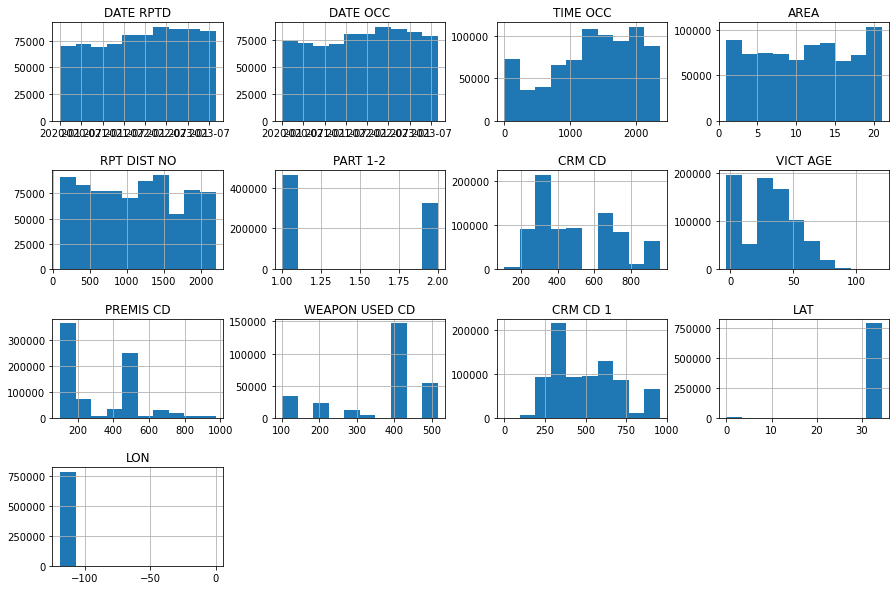

In [37]:
crime_data_cleaned.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

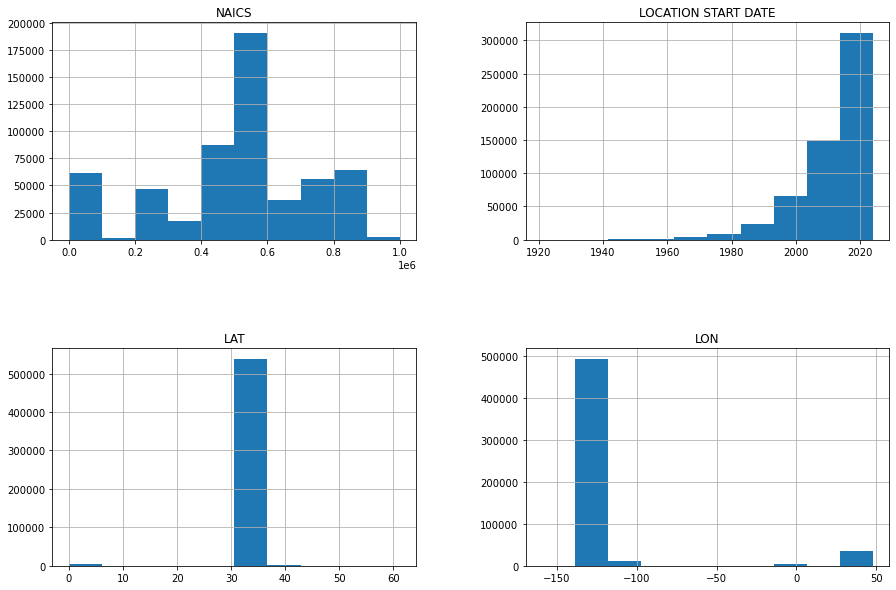

In [38]:
biz_data_cleaned.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

# Distribution Of Cimes By Area

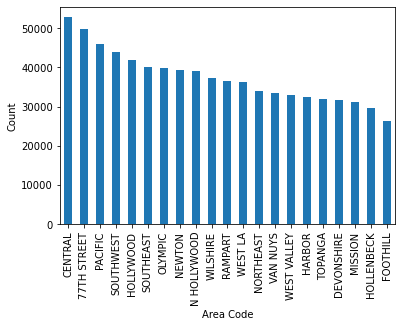

In [39]:
crime_data_cleaned['AREA NAME'].value_counts().plot(kind='bar')
plt.xlabel('Area Code')
plt.ylabel('Count')
plt.show()

# Distribution Of Biz By City

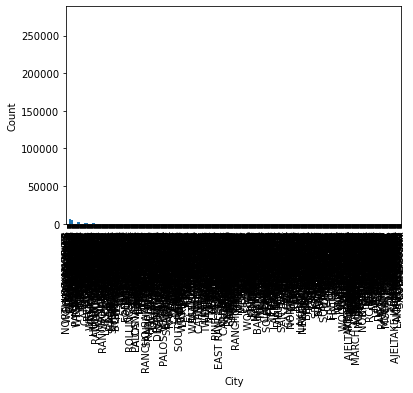

In [42]:
biz_data_cleaned['CITY'].value_counts().plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()